[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.


a) Genus or species of an animal

b) Height (in cm)

c) Age (in integer years)

d) Weight

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions. 

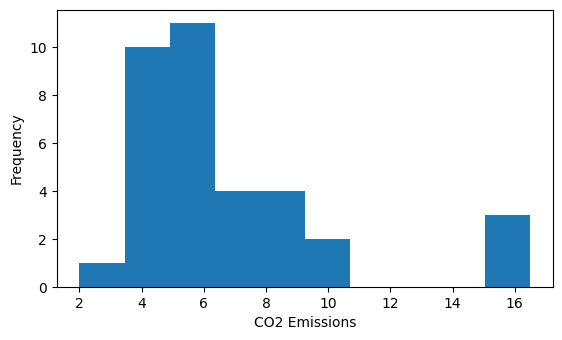

In [2]:
fig, ax = plt.subplots()
ax.hist(carbon_west["CO2"], bins=10)
ax.set_xlabel("CO2 Emissions")
ax.set_ylabel("Frequency")
fig.set_size_inches(16*0.4, 9*0.4)
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [3]:
co2 = carbon_west["CO2"]
mean = np.mean(co2)
median = np.median(co2)
std = np.std(co2)

print(f"Mean: {mean}\nMedian: {median}\nStandard Deviation: {std}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [5]:
murders_woDC = murders.drop(index=50)
murder_rates_woDC = murders_woDC["murder"]

mean = np.mean(murder_rates_woDC)
std = np.std(murder_rates_woDC)

print(f"Mean: {mean}\nStandard Deviation: {std}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [6]:
murder_rates_woDC = murders_woDC["murder"]

min_v = np.min(murder_rates_woDC)
lq = np.percentile(murder_rates_woDC, 25)
med = np.median(murder_rates_woDC)
uq = np.percentile(murder_rates_woDC, 75)
max_v = np.max(murder_rates_woDC)


print(f"Minimum: {min_v}\nLower Quartile: {lq}\nMedian: {med}\nUpper Quartile: {uq}\nMaximum: {max_v}")

Minimum: 1.0
Lower Quartile: 2.625
Median: 4.85
Upper Quartile: 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [7]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murder_rates = murders["murder"]

mean = np.mean(murder_rates)
std = np.std(murder_rates)
min_v = np.min(murder_rates)
lq = np.percentile(murder_rates, 25)
med = np.median(murder_rates)
uq = np.percentile(murder_rates, 75)
max_v = np.max(murder_rates)


print(f"Mean: {mean}\nStandard Deviation: {std}\nMinimum: {min_v}\nLower Quartile: {lq}\nMedian: {med}\nUpper Quartile: {uq}\nMaximum: {max_v}")
print(f"\nThe mean is much more susceptible to change than the median.\nSame goes for the range and the interquartile range.\nSince the maximum value changes drastically, the range increasing significantly.\nThe interquartile range is more robust to outliers.")

Mean: 5.252941176470588
Standard Deviation: 3.688687153732127
Minimum: 1.0
Lower Quartile: 2.6500000000000004
Median: 5.0
Upper Quartile: 6.45
Maximum: 24.2

The mean is much more susceptible to change than the median.
Same goes for the range and the interquartile range.
Since the maximum value changes drastically, the range increasing significantly.
The interquartile range is more robust to outliers.


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [8]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home. 

In [9]:
def plot_scatter(x, y, x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x, y, marker="o")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.set_size_inches(16*0.4, 9*0.4)
    return fig, ax

(<Figure size 640x360 with 1 Axes>,
 <Axes: xlabel='Square Feet (ft^2)', ylabel='Price of Home ($1000s)'>)

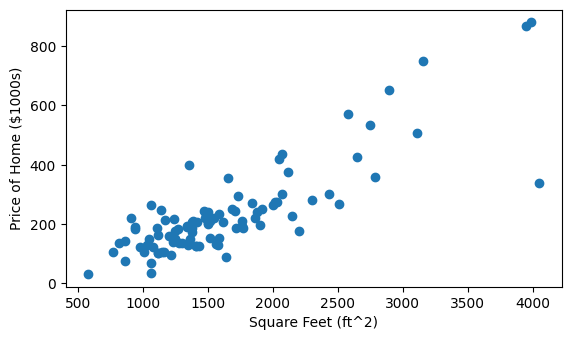

In [10]:
square_feet = houses[["size"]]
price = houses["price"]

plot_scatter(square_feet, price, "Square Feet (ft^2)", "Price of Home ($1000s)")


Part b. Find the correlation between the two variables.

In [11]:
houses.corr()["size"]["price"]

0.8337847885586536

Part c. Find and plot the regression line on top of the scatterplot. 

Slope: 0.18989116794379624
Intercept: -76.38938210746838


/Users/booka66/miniforge3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


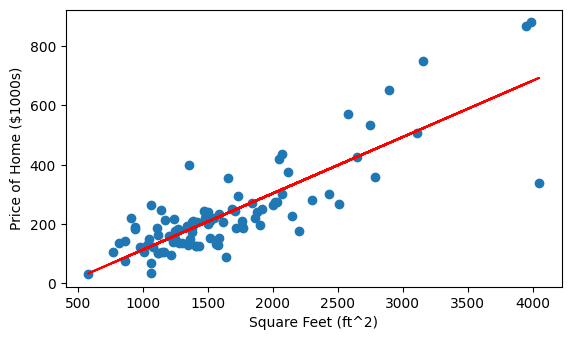

In [12]:
model = LinearRegression()
model.fit(square_feet, price)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}\nIntercept: {intercept}")

fig, ax = plot_scatter(square_feet, price, "Square Feet (ft^2)", "Price of Home ($1000s)")
ax.plot(square_feet.values, model.predict(square_feet.values), color="red")

plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

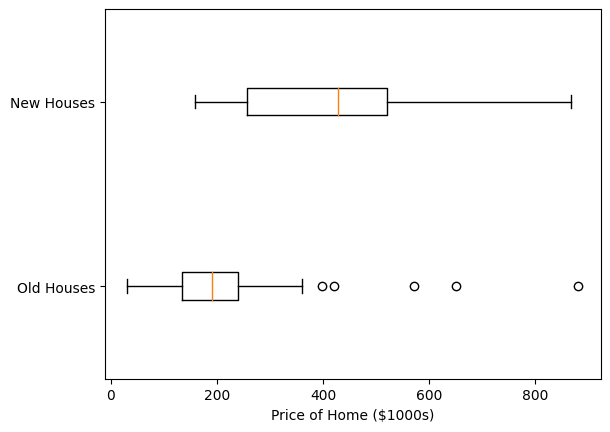

In [13]:
old_houses = houses[houses["new"] == 0]
new_houses = houses[houses["new"] == 1]

data = {
    "Old Houses": old_houses["price"].values,
    "New Houses": new_houses["price"].values
}

fig, ax = plt.subplots()
ax.boxplot(data.values(), labels=data.keys(), vert=False)
ax.set_xlabel("Price of Home ($1000s)")

plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

### Size vs Price
There is a strong positive correlation between size and price of a house. As the size of a house increases, the price of the house increases as well.

### New vs Old
The median price of an old home is much less that that of a new home. There quite a few outliers with old homes, though, likely older homes that are large and retained their value over time. Interestingly, the upper quartile for old homes is less than the lower quartile of new homes.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [14]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\\s+")
happy.head()

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male


In [15]:
pd.crosstab(happy["marital"], happy["happiness"])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
